In [1]:
import numpy as np
import json
import yaml
import statsmodels.api as sm
from matplotlib import pyplot as plt 
import matplotlib.patches as mpatches
import os
from utils_new import extract_PID_data, resample_PID_data, RPM_Contraint, Throttle_Contraint, Engine_load_Contraint, idle_Contraint, IS_Contraint, find_nearest
from utils_new import retain_monotonicity,zoh_vec,segments_fit
from state_logic import state_detection, quality_of_soot_burn_v1, get_milage
from scipy.signal import hilbert


In [2]:
# Read configuration file
Config_path = "D:/Work/Timeseries_models/Code/DPF_classification/State_logic/config.yml"
with open(Config_path, 'r') as file:
    Config = yaml.safe_load(file)


# Extract configuration informatioon
VEHICLE = Config['vehicle_num']
PATH = "D:/Work/Timeseries_models/DATA/FULL_DATA/" + VEHICLE + "/"
VARIABLES = Config['VARIABLES']
RPM_RANGE = Config['RPM_RANGE']
THROTTLE_CUTOFF = Config['THROTTLE_CUTOFF']
ENGINE_LOAD_CUTOFF = Config['ENGINE_LOAD_CUTOFF']
ENGINE_IDLE_SWITCH = Config['ENGINE_IDLE_SWITCH']
REGN_INHIBT_SWITCH = Config['REGN_INHIBT_SWITCH']
active_TS = np.array(Config['vehicle'][VEHICLE]['active_TS'])
removed_TS = np.array(Config['vehicle'][VEHICLE]['removed_TS'])

In [3]:

# Data Read
dir_list = os.listdir(PATH)
for data_packet_cnt in range(0,len(dir_list)):
#for data_packet_cnt in range(0,5):
    OBD_data_path = PATH + dir_list[data_packet_cnt] 
    OBD_data = [json.loads(line) for line in open(OBD_data_path, 'r')]
    T_L = []
    V_L = []
    for var_type in VARIABLES:
        X_Time, X_Value = extract_PID_data(OBD_data,'SAE',var_type, 0)
        #print(len(X_Value))
        T_L.append(np.array((X_Time), dtype=np.int64))
        V_L.append(np.array((X_Value), dtype=float))
    if (len(V_L[0]) > 100):
        Temp_time = np.array(T_L[1]) # its DP time so no need to resample
        Resample_data = resample_PID_data(V_L,len(VARIABLES)) # cross check by plot
        Resample_data[8,:] = retain_monotonicity(Resample_data[8,:])
        Resample_data[9,:] = retain_monotonicity(Resample_data[9,:])

        if (data_packet_cnt == 0):
            DATA = Resample_data
            T1 = Temp_time 
        else:
            DATA = np.concatenate((DATA,Resample_data),axis=1)
            T1 = np.concatenate((T1,Temp_time),axis=0)

X_1,T2 = RPM_Contraint(DATA,T1,np.array(RPM_RANGE))
X_2,T3 = Throttle_Contraint(X_1,T2,THROTTLE_CUTOFF)
X_3,T4 = Engine_load_Contraint(X_2,T3,ENGINE_LOAD_CUTOFF)
X_4,T5 = idle_Contraint(X_3,T4,ENGINE_IDLE_SWITCH)
X,T6 = IS_Contraint(X_4,T5,REGN_INHIBT_SWITCH)

print(X_3.shape)
print(T4.shape)

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 7228
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 1619
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 6675
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 6675
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 1668
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 1315
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 1670
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 557
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 552
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 550
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 1641
PID TAG is-->EN

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 5944
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 1353
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 5487
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 5487
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 1371
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 1195
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 1373
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 457
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 456
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 454
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 1358
PID TAG is-->EN

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1116
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 250
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1029
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1029
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 257
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 235
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 258
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 86
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 85
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 84
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 251
PID TAG is-->ENGINE RPM

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1861
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 420
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1718
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1718
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 429
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 355
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 430
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 143
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 141
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 142
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 420
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1758
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 402
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1623
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1623
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 406
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 374
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 406
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 135
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 135
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 135
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 403
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 2080
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 476
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1919
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1919
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 480
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 456
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 480
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 160
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 159
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 159
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 474
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1800
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 413
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1661
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1661
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 416
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 404
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 416
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 138
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 138
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 138
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 412
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 2034
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 465
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1879
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1879
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 470
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 454
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 470
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 156
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 156
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 156
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 467
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 2036
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 465
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1877
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1877
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 469
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 444
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 469
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 156
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 156
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 156
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 466
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1418
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 316
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1310
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1310
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 327
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 276
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 328
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 109
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 108
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 108
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 319
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 579
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 87
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 535
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 535
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 134
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 68
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 134
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 45
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 44
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 44
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 90
PID TAG is-->ENGINE RPM ,SAE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 2353
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 528
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 2172
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 2172
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 543
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 487
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 543
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 181
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 181
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 181
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 543
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 784
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 153
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 725
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 725
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 181
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 133
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 182
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 59
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 59
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 59
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 173
PID TAG is-->ENGINE RPM ,S

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1521
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 349
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1404
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1404
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 351
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 329
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 351
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 117
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 117
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 116
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 348
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1187
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 274
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1096
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1096
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 274
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 274
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 274
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 91
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 91
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 90
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 273
PID TAG is-->ENGINE RPM

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 2228
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 514
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 2057
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 2057
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 514
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 514
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 514
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 171
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 171
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 171
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 514
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 506
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 117
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 466
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 466
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 117
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 116
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 117
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 39
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 38
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 38
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 116
PID TAG is-->ENGINE RPM ,S

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1847
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 426
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1704
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1704
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 426
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 426
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 426
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 142
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 142
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 141
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 426
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 2441
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 564
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 2254
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 2254
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 563
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 563
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 564
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 188
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 187
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 187
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 563
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1815
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 419
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1676
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1676
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 419
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 419
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 419
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 140
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 139
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 138
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 419
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 827
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 192
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 764
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 764
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 191
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 190
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 192
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 63
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 63
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 62
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 190
PID TAG is-->ENGINE RPM ,S

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1727
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 399
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1595
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1595
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 399
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 398
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 399
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 132
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 132
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 130
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 396
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 439
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 102
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 406
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 406
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 102
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 100
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 102
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 33
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 33
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 31
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 100
PID TAG is-->ENGINE RPM ,S

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1935
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 447
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1787
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1787
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 447
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 446
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 447
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 149
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 148
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 147
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 446
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 5379
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 1241
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 4963
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 4963
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 1241
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 1241
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 1241
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 414
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 412
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 412
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 1239
PID TAG is-->EN

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 4258
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 986
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 3934
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 3934
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 983
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 981
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 986
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 330
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 321
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 322
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 978
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 8956
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 2070
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 8269
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 8269
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 2067
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 2065
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 2070
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 689
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 686
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 683
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 2063
PID TAG is-->EN

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1598
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 370
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1475
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1475
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 368
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 368
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 370
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 123
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 122
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 122
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 368
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1788
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 413
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1651
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1651
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 413
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 412
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 413
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 138
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 137
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 136
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 411
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 2139
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 494
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1974
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1974
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 494
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 493
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 494
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 164
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 164
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 164
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 493
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 703
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 164
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 650
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 650
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 162
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 162
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 164
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 54
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 52
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 51
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 160
PID TAG is-->ENGINE RPM ,S

PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 489
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 1474
PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1081
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 250
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 999
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 999
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 250
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 248
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 251
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 83
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 81
PID TAG is-->DISTANCE ,

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 104
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 24
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 96
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 96
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 24
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 24
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 24
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 8
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 8
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 8
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 24
PID TAG is-->ENGINE RPM ,SAE Mapping

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 7318
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 1689
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 6756
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 6756
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 1689
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 1689
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 1689
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 563
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 563
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 563
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 1689
PID TAG is-->EN

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 416
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 96
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 385
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 385
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 96
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 96
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 96
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 32
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 31
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 30
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 96
PID TAG is-->ENGINE RPM ,SAE Ma

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 143
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 33
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 132
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 132
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 33
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 33
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 33
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 11
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 11
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 11
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 33
PID TAG is-->ENGINE RPM ,SAE Ma

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 175
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 40
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 162
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 162
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 40
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 40
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 40
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 14
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 12
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 11
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 40
PID TAG is-->ENGINE RPM ,SAE Ma

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 2360
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 545
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 2179
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 2179
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 545
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 544
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 545
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 182
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 181
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 181
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 544
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1625
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 375
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1500
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1500
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 375
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 375
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 375
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 125
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 125
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 125
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 375
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 318
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 74
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 293
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 293
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 73
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 73
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 74
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 24
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 24
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 24
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 72
PID TAG is-->ENGINE RPM ,SAE Ma

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1443
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 334
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1333
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1333
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 333
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 333
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 334
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 111
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 111
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 109
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 332
PID TAG is-->ENGINE 

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 277
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 66
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 258
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 258
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 65
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 63
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 66
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 21
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 19
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 19
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 61
PID TAG is-->ENGINE RPM ,SAE Ma

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 441
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 102
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 407
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 407
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 102
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 102
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 102
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 34
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 34
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 34
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 101
PID TAG is-->ENGINE RPM ,S

PID TAG is-->ENGINE RPM ,SAE Mapping is ---> 190
Number of time stamp avilables are---> 1485
PID TAG is-->DPFDP ,SAE Mapping is ---> 3251
Number of time stamp avilables are---> 343
PID TAG is-->THROTTLE ,SAE Mapping is ---> 91
Number of time stamp avilables are---> 1372
PID TAG is-->ENGINE LOAD ,SAE Mapping is ---> 92
Number of time stamp avilables are---> 1372
PID TAG is-->SCRT ,SAE Mapping is ---> 4360
Number of time stamp avilables are---> 343
PID TAG is-->SPEED ,SAE Mapping is ---> 84
Number of time stamp avilables are---> 343
PID TAG is-->DPFINT ,SAE Mapping is ---> 4766
Number of time stamp avilables are---> 343
PID TAG is-->IS ,SAE Mapping is ---> 3703
Number of time stamp avilables are---> 114
PID TAG is-->FUEL USE ,SAE Mapping is ---> 5054
Number of time stamp avilables are---> 114
PID TAG is-->DISTANCE ,SAE Mapping is ---> 245
Number of time stamp avilables are---> 112
PID TAG is-->ATGMF ,SAE Mapping is ---> 3236
Number of time stamp avilables are---> 342
(11, 20024)
(20024,)

[  278   929  1895  2745  4680  6108  7143  8514 10456 12799 15595 17747]
[  476   989  2109  3065  5198  6406  7352  8751 12467 15580 17462 18275]


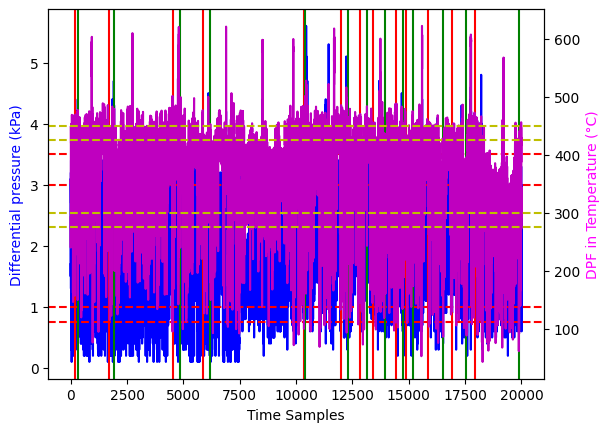

In [4]:
sw_cycle,dp_trend = sm.tsa.filters.hpfilter(X[1,:], lamb=100)
Slope_of_dp = np.gradient(dp_trend)
sw_cycle,temp_trend = sm.tsa.filters.hpfilter(X[4,:], lamb=10)

A_TS, N_TS,DP_level,TEMP_level = state_detection(X[1,:],temp_trend,Slope_of_dp,Config['Thresholds'])
print(A_TS)
print(N_TS)

#print(T6[11150])
#print(T6[20436])  
#plt.plot(DP_level,'b')
#plt.plot(TEMP_level,'r')

#### PLOTING BOSCH
fig, ax1 = plt.subplots()
ax1.plot(X[1,:],'b')
ax1.set_ylabel('Differential pressure (kPa)')
ax1.yaxis.label.set_color('blue') 
ax1.set_xlabel('Time Samples')

#ax1.plot(dp_trend,'k')
ax1.axhline(y=Config['Thresholds']['DP_HIGH_MAX'], xmin=0, xmax=len(X[1,:]), color='r',linestyle='--')
ax1.axhline(y=Config['Thresholds']['DP_HIGH_MIN'], xmin=0, xmax=len(X[1,:]), color='r',linestyle='--')
ax1.axhline(y=Config['Thresholds']['DP_LOW_MAX'], xmin=0, xmax=len(X[1,:]), color='r',linestyle='--')
ax1.axhline(y=Config['Thresholds']['DP_LOW_MIN'], xmin=0, xmax=len(X[1,:]), color='r',linestyle='--')

A_indx = np.zeros(active_TS.shape)
N_indx = np.zeros(removed_TS.shape)
for cnt in range (0,active_TS.shape[0]):
    VAL,IDX = find_nearest(T6, active_TS[cnt])
    A_indx[cnt] = IDX
    VAL,IDX = find_nearest(T6, removed_TS[cnt])
    N_indx[cnt] = IDX
    ax1.axvline(x = A_indx[cnt] , ymin=0, ymax=3, color='r')
    ax1.axvline(x = N_indx[cnt] , ymin=0, ymax=3, color='g')

ax2 = ax1.twinx() 
ax2.plot(X[4,:],'m')
ax2.set_ylabel('DPF in Temperature (°C)')
ax2.yaxis.label.set_color('magenta') 
#ax2.plot(temp_trend,'k')
ax2.axhline(y=Config['Thresholds']['SCR_TEMP_HIGH_MAX'], xmin=0, xmax=len(X[4,:]), color='y',linestyle='--')
ax2.axhline(y=Config['Thresholds']['SCR_TEMP_HIGH_MIN'], xmin=0, xmax=len(X[4,:]), color='y',linestyle='--')
ax2.axhline(y=Config['Thresholds']['SCR_TEMP_LOW_MAX'], xmin=0, xmax=len(X[4,:]), color='y',linestyle='--')
ax2.axhline(y=Config['Thresholds']['SCR_TEMP_LOW_MIN'], xmin=0, xmax=len(X[4,:]), color='y',linestyle='--')
plt.show()

In [5]:
sw_cycle,temp_trend = sm.tsa.filters.hpfilter(X[6,:], lamb=10)
#BURN_Quality,DP_Fall = quality_of_soot_burn(X[1,:],temp_trend,Config['Thresholds'])
BURN_Quality,DP_Fall = quality_of_soot_burn_v1(X[1,:],X[10,:],temp_trend,Config['Thresholds'])
Milage_trend, Milage_trend_ZOH= get_milage(X[8,:],X[9,:],100)

C:\Users\Bhushan.Patil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


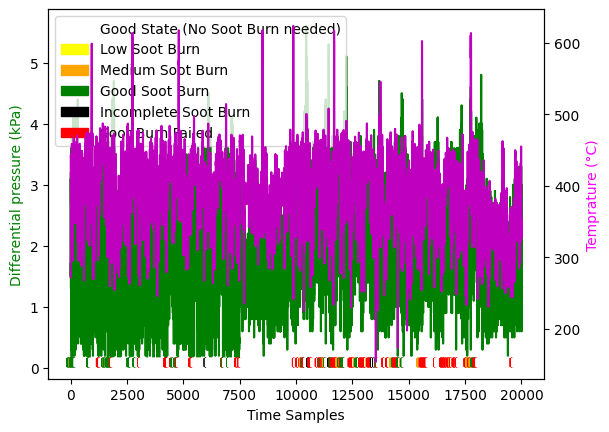

In [6]:
fig, ax3 = plt.subplots()
ax3.plot(X[1,:],'g')
ax3.set_ylabel('Differential pressure (kPa)')
ax3.yaxis.label.set_color('green')  
ax3.set_xlabel('Time Samples')

col =[]
for i in range(0, len(BURN_Quality)):
    if (BURN_Quality[i]<=0):
        col.append('white')  
    elif ((BURN_Quality[i]>0) and (BURN_Quality[i]<0.5)):
        col.append('yellow')
    elif ((BURN_Quality[i]>=0.5) and (BURN_Quality[i]<0.8)):
        col.append('orange')
    elif ((BURN_Quality[i]>=0.8) and (BURN_Quality[i] <= 1) ):
        col.append('green')
    elif ((BURN_Quality[i] == 2)):
        col.append('black')
    elif ((BURN_Quality[i] == 3)):
        col.append('red')

for i in range(len(BURN_Quality)):
    ax3.plot(i,0.1,c = col[i],marker='>')

white_patch = mpatches.Patch(color='white', label='Good State (No Soot Burn needed)')
yellow_patch = mpatches.Patch(color='yellow', label='Low Soot Burn')
orange_patch = mpatches.Patch(color='orange', label='Medium Soot Burn')
green_patch = mpatches.Patch(color='green', label='Good Soot Burn')
black_patch = mpatches.Patch(color='black', label='Incomplete Soot Burn')
red_patch = mpatches.Patch(color='red', label='Soot Burn Failed')
ax3.legend(handles=[white_patch, yellow_patch, orange_patch, green_patch, black_patch, red_patch])

ax4 = ax3.twinx() 
ax4.plot(temp_trend,'m')
ax4.set_ylabel('Temprature (°C)')
ax4.yaxis.label.set_color('magenta') 
plt.show()

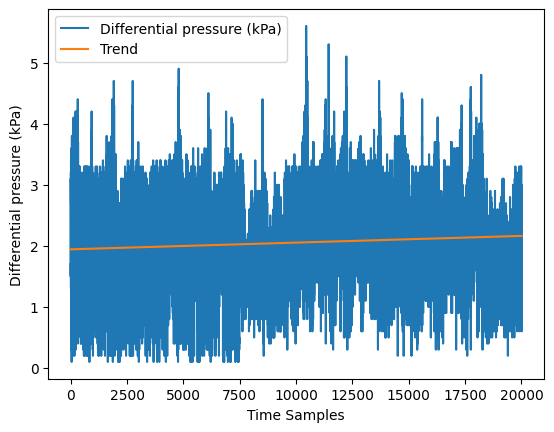

In [7]:
#### EVELOPE PLOT
SIG = X[1,:]
X1 = np.array(range(0,len(SIG)))
z = np.polyfit(X1, SIG, 1)
#print(z)
FIT = z[0]*X1 + z[1]
plt.plot(SIG, label='signal')
plt.plot(FIT, label='trend')
plt.ylabel('Differential pressure (kPa)')
plt.xlabel('Time Samples')
plt.legend(["Differential pressure (kPa)", "Trend"])

plt.show()



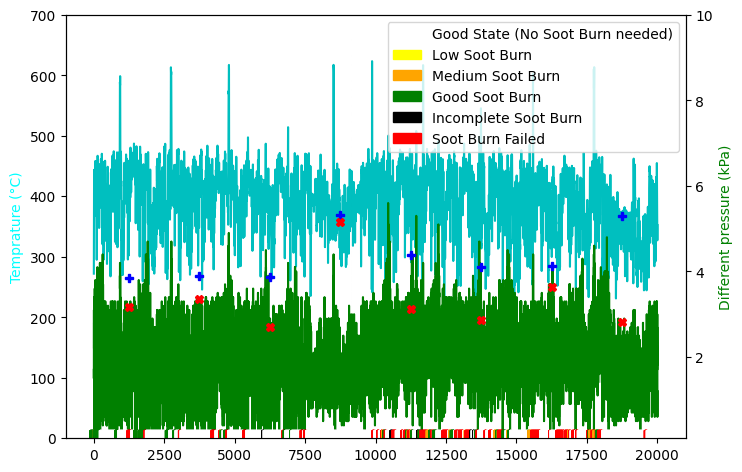

In [11]:
########## MILAGE TREND IN BURN CASE ######
Good_milage = -5*np.zeros(len(BURN_Quality))
Bad_milage = -5*np.zeros(len(BURN_Quality))

for i in range(0, len(BURN_Quality)):
    if(BURN_Quality[i] == 0):
        Good_milage[i] = Milage_trend_ZOH[i]
    elif((BURN_Quality[i] > 1)): 
        Bad_milage[i] = Milage_trend_ZOH[i]

Good_milage_ZOH = zoh_vec(Good_milage)
Bad_milage_ZOH = zoh_vec(Bad_milage)

Good_milage_mean = -5*np.zeros(len(BURN_Quality))
Bad_milage_mean = -5*np.zeros(len(BURN_Quality))

for frame_cnt in range(0, len(BURN_Quality)-2500,2500):
    Good_milage_mean[frame_cnt+1250] = np.mean(Good_milage_ZOH[frame_cnt:frame_cnt+2500])
    Bad_milage_mean[frame_cnt+1250] = np.mean(Bad_milage_ZOH[frame_cnt:frame_cnt+2500])
    
    
fig, ax5 = plt.subplots()
ax5.plot(temp_trend,'c')
ax5.set_ylabel('Temprature (°C)')
ax5.yaxis.label.set_color('cyan') 
ax5.axis(ymin=0,ymax=700)

ax6 = ax5.twinx()

ax6.plot(X[1,:],'g')
ax6.set_xlabel('Time Samples')
ax6.set_ylabel('Different pressure (kPa)')
ax6.yaxis.label.set_color('green')

#ax6.plot(Milage_trend,'m*')
ax6.plot(Good_milage_mean,"bP")
ax6.plot(Bad_milage_mean,"rX")
ax6.axis(ymin=0.1,ymax=10)

for i in range(len(BURN_Quality)):
    ax6.plot(i,0.2,c = col[i],marker='>')

ax6.legend(handles=[white_patch, yellow_patch, orange_patch, green_patch, black_patch, red_patch])

plt.show()
plt.rcParams["figure.figsize"] = (12,12)